# JOBMAIL SmarterSearch test

The Notifications team spent a large portion of Q1 working with Hobbit to integrate SmarterSearch into their JobMail and JobMailLite products. Prior to the experiment, jobs surfaced in emails were powered byt the JobSearch API. 

**Experiment objective:**  The team wanted to compare _job clicks per open_ for unique candidates between emails generated from the SmarterSearch API (Champion: B) vs the current JobSearch API (Challenger: A) as a measure of change in engagement. The experiment was conducted in a 50%/50% split, for both products. Candidates were assigned groups by performing a modulus 100 on the hashed email address.  

**Experiment Duration:** 4th October to 14th October. (this includes a 3 day burn in period to account for novelty affect)

**Launch**<br>
**5%**: Tuesday 01/10/2019<br>
**10%**: Wednesday 02/10/2019<br>
**25%**: Thursday 03/10/2019<br>
**50%**: Friday 04/10/2019<br>
**conclusion:** Monday 14/10/2019<br>

**Null hypothesis:** There is no change in _job clicks per open_ per unique candidate between groups.

**Alternative hypothesis:** SmarterSearch has greater _job clicks per open_ per unique candidate than JobSearch (alpha 0.05)

$$H_0: \mu SmarterSearch job ctr - \mu JobSearch job ctr = 0$$
$$H_1: \mu SmarterSearch job ctr - \mu JobSearch job ctr > 0$$

**Results**
There was an uplift of 0.0138 (12.3%) in _job clicks per open per unique candidate_ in favour of SmarterSearch, with a _p value of 0_ (statistically significant).


**Details of Results**<br>
Champion Size: 467,146 <br>
Champion Mean: 0.126 <br>
Champion Std Dev: 0.343 <br>
<br>
Challenger Size: 468,279 <br>
Challenger Mean: 0.112 <br>
Challenger Std Dev: 0.305 <br>
<br>
Diff in Means (abs): 0.0138 <br>
Diff in Means (%): 12.3 <br>
<br>
T Statistic: 20.48 <br>
P Value: 0.0 <br>

In [43]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import t

# plotting
import altair as alt

%matplotlib inline

### Import Data

In [3]:
# import data
df_7 = pd.read_csv('JM_2019-10-07.csv')
df_8 = pd.read_csv('JM_2019-10-08.csv')
df_9 = pd.read_csv('JM_2019-10-09.csv')
df_10 = pd.read_csv('JM_2019-10-10.csv')
df_11 = pd.read_csv('JM_2019-10-11.csv')
df_12 = pd.read_csv('JM_2019-10-12.csv')

# Concat together
df = pd.concat([df_7, df_8, df_9, df_10, df_11, df_12], ignore_index=True, sort=False) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004989 entries, 0 to 4004988
Data columns (total 9 columns):
date_key_aet       object
candidate_id       int64
hashed_email       object
saved_search_id    int64
message_type       object
jobs_source        object
opened             int64
tot_clicks         int64
job_clicks         int64
dtypes: int64(5), object(4)
memory usage: 275.0+ MB


In [3]:
df.head()

,date_key_aet,candidate_id,hashed_email,saved_search_id,message_type,jobs_source,opened,tot_clicks,job_clicks
0,2019-10-07,28019372,4dac74ec60782822b6515c29a5c64293,501579999,SeekDaily,JobSearchAPI (Elastic),5,2,1
1,2019-10-07,27691570,d75f0c31ca0eaa2bdd51ace758dc8a39,500498362,SeekDaily,JobSearchAPI (Elastic),2,1,0
2,2019-10-07,37297161,b20a7bf6dd5a170da989842953fee970,500771607,SeekDaily,JobSearchAPI (Elastic),1,0,0
3,2019-10-07,31618679,d0d16d0eb063a9147628d6ccadd45c1b,18756235,SeekDaily,JobSearchAPI (Elastic),2,0,0
4,2019-10-07,37283421,eee71a46abed99c0d03b246ed5a08236,16012444,SeekDaily,SmarterSearchBatch,4,0,0


### Clean and Split Data

The primary metric is _job clicks per open per unique candidate_. To get this, we need to `groupby` `hashed_email` and retain `jobs_source`, then sum `opened`, `tot_clicks` and `job_clicks`

In [4]:
# remove unknown
df = df[df['jobs_source'] != 'unknown']

# group data
df = df.groupby(['hashed_email', 'jobs_source'], as_index=False)[['opened', 'tot_clicks', 'job_clicks']].sum()

# drop duplicates
df.drop_duplicates(subset='hashed_email', keep=False, inplace=True)

# add conversion
df['tot_ctr'] = (df['tot_clicks'] / df['opened'])
df['job_ctr'] = (df['job_clicks'] / df['opened'])

# save grouped df
#df.to_csv('JM_grouped.csv')

# split into Control and Challenger
df_a = df[df['jobs_source'] == 'JobSearchAPI (Elastic)']
df_b = df[df['jobs_source'] == 'SmarterSearchBatch']

# save data
#df_a.to_csv('JM_A_data.csv', index=False)
#df_b.to_csv('JM_B_data.csv', index=False)

df.head()

,hashed_email,jobs_source,opened,tot_clicks,job_clicks,tot_ctr,job_ctr
0,1000066de4219506b9646442e0500beb,SmarterSearchBatch,11,1,0,0.090909,0.0
1,100036494080daa1821a201462eeec5a,JobSearchAPI (Elastic),4,0,0,0.000000,0.0
4,100048dd0277ffc2930b6dc6d2dc901,SmarterSearchBatch,7,0,0,0.000000,0.0
5,100050577502409ede711313abd199b9,JobSearchAPI (Elastic),6,0,0,0.000000,0.0
6,100080e4777942bcb78bd0a5184ffe10,JobSearchAPI (Elastic),5,0,0,0.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935425 entries, 0 to 995046
Data columns (total 7 columns):
hashed_email    935425 non-null object
jobs_source     935425 non-null object
opened          935425 non-null int64
tot_clicks      935425 non-null int64
job_clicks      935425 non-null int64
tot_ctr         935425 non-null float64
job_ctr         935425 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 57.1+ MB


In [5]:
df.hashed_email.duplicated().sum()

0

### Sample Stats for Data

In [5]:
# check 50/50 split
df.groupby('jobs_source')[['job_ctr']].describe()

job_ctr                                               \
                           count      mean       std  min  25%  50%       75%   
jobs_source                                                                     
JobSearchAPI (Elastic)  468279.0  0.111793  0.304797  0.0  0.0  0.0  0.083333   
SmarterSearchBatch      467146.0  0.125544  0.343292  0.0  0.0  0.0  0.105263   

                              
                         max  
jobs_source                   
JobSearchAPI (Elastic)  25.0  
SmarterSearchBatch      33.0

In [10]:
# check candidate split
df.groupby('jobs_source', as_index=False)[['hashed_email']].describe()

hashed_email                                               
         count  unique                               top freq
0       468279  468279  c26dd7cdea33878dd31da4779bd77510    1
1       467146  467146  6e8c63a89588ad0045d6586ac9b0a8b9    1

# T-Test
### Job clicks per open per unique caniddate

In [10]:
df_a.head()

,hashed_email,jobs_source,opened,tot_clicks,job_clicks,tot_ctr,job_ctr
1,100036494080daa1821a201462eeec5a,JobSearchAPI (Elastic),4,0,0,0.0,0.0
5,100050577502409ede711313abd199b9,JobSearchAPI (Elastic),6,0,0,0.0,0.0
6,100080e4777942bcb78bd0a5184ffe10,JobSearchAPI (Elastic),5,0,0,0.0,0.0
11,1000b487ff2ee45a4397fd195253aea0,JobSearchAPI (Elastic),7,0,0,0.0,0.0
15,1000e31522bda565e5804e188f7f385,JobSearchAPI (Elastic),7,0,0,0.0,0.0


In [26]:
## JOB CTR
alpha = 0.05
a_n, b_n = len(df_a.jobs_source), len(df_b.jobs_source) 


## STEP 1
# means
a_mean, b_mean = df_a.job_ctr.mean(), df_b.job_ctr.mean()

## STEP 2
# calculate standard deviation
a_std, b_std = df_a.job_ctr.std(), df_b.job_ctr.std()

print(a_mean, b_mean, a_std, b_std)

0.11179297463416903 0.12554393842256895 0.30479745103799977 0.3432921021253699


In [29]:
# calculate the standars error
# se = std / sqrt(n)

# STEP 3
a_se, b_se = (a_std / np.sqrt(a_n)), (b_std / np.sqrt(b_n)) 

# STEP 3a
# calculate the standard error on the difference between the samples
sed = np.sqrt(a_se**2.0 + b_se**2.0)

print(a_se, b_se, sed, (b_mean - a_mean))

0.00044540900146539727 0.0005022702957911757 0.0006713155953950104 0.01375096378839992


In [37]:
# STEP 4
# t-stat
t_stat = (b_mean - a_mean) / sed


# STEP 5
# degrees of freedom
degf = b_n + a_n - 2

# STEP 6
# calculate the critical value
cv = t.ppf(1.0 - alpha, degf)

print(t_stat, degf)

20.483605449846106 935423


In [38]:
# STEP 7
# calculate p-value for T-distribution
# calculate the probability of getting a result at least as extreme as our t-stat (-6.4)
# multiply by 2 because we want to know EITHER positive or negative
p = (1 - t.cdf(abs(t_stat), degf)) * 2
print(t_stat, p)

20.483605449846106 0.0


**Check results with SciPy**

In [39]:
data_a, data_b = df_a.job_ctr, df_b.job_ctr

stats.ttest_ind(data_b, data_a)

Ttest_indResult(statistic=20.48654259088619, pvalue=2.975935673127763e-93)

Check results with [Evan Miller](https://www.evanmiller.org/ab-testing/t-test.html)

![](JM_EM_result.PNG)

## Interpreting results/ Notes
- Let's assume Null hypothesis (H0) is true
- set a significance level of 0.05 (5%)
- Assuming the null is true, what is the probability of getting a difference between sample proportions this extreme or more.
- if this probability is less than significance level we then reject the null, suggesting the alternative


- If the probability of the difference value from the experiment is less than or equal to 5%, the experiment most likely did not happen by "chance" alone. 
- Thus, the results show a statistically significant difference between the two groups.


- we are figuring out what the probability is of getting a result at least as extreme or more extreme than the sample statistic (ie T Stat)
- probability that the sample stat will fall in the shaded area of the distribution


## Alternate Method
### Analysing the difference in means

Job Clicks per Open per Unique Candidate

**H0:** $\mu$SmarterSearch ctr - $\mu$JobSearch ctr = 0<br>
**H1:** $\mu$SmarterSearch ctr - $\mu$JobSearch ctr > 0

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import t

# plotting
import altair as alt

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_a = pd.read_csv('JM_A_data.csv')
df_b = pd.read_csv('JM_B_data.csv')

df = pd.concat([df_a, df_b], ignore_index=True)

df_b.head()

,hashed_email,jobs_source,opened,tot_clicks,job_clicks,tot_ctr,job_ctr
0,1000066de4219506b9646442e0500beb,SmarterSearchBatch,11,1,0,0.090909,0.000000
1,100048dd0277ffc2930b6dc6d2dc901,SmarterSearchBatch,7,0,0,0.000000,0.000000
2,10008f867f3a2018bf9c8f47963ad69c,SmarterSearchBatch,3,1,1,0.333333,0.333333
3,1000901de60bcbff52d240af921a8291,SmarterSearchBatch,1,0,0,0.000000,0.000000
4,1000a1cf6cfb22a3abefba367b946cb,SmarterSearchBatch,4,2,1,0.500000,0.250000


In [29]:
# mean CTR for JobSearch
a_ctr_mean = df_a['job_ctr'].mean()
a_ctr_mean

0.11179297463416903

In [31]:
# mean CTR for SmarterSearch
b_ctr_mean = df_b['job_ctr'].mean()
b_ctr_mean

0.12554393842256892

In [33]:
obs_diff = b_ctr_mean - a_ctr_mean
obs_diff

0.013750963788399892

## Check significance 
- Bootstrap sample to simulate sampling dist for difference in means
- We can compute p-value for our statistic (observed diff in means) by simulating the distribution under the null hypothesis, then finding probability that our statistic came from this distribution.

In [34]:
diffs = []

for _ in range(10000):
    # sample 20% of data
    boot_sample = df.sample(frac=.2, replace=True)
    # split dfs
    a_df = boot_sample.query('jobs_source == "JobSearchAPI (Elastic)"')
    b_df = boot_sample.query('jobs_source == "SmarterSearchBatch"')
    # calc ctr
    ctr_a_mean = a_df['job_ctr'].mean()
    ctr_b_mean = b_df['job_ctr'].mean()
    
    # add difference to diffs list
    diffs.append(ctr_b_mean - ctr_a_mean)
    

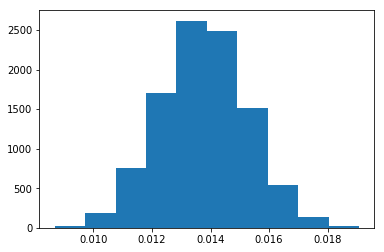

In [35]:
# plot the observed statistic (diff in means)

plt.hist(diffs);

To simulate from the null, create a norm distribution, centred at 0, with the same std deviation as our sampling distribution above. 

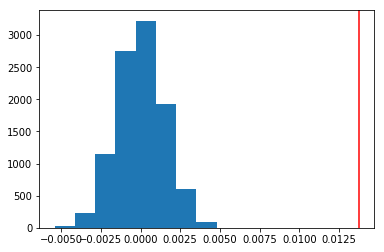

In [40]:
diffs = np.array(diffs)
# random normal distribution centred at 0 with same standard deviation as our above distribution
null_vals = np.random.normal(0, diffs.std(), diffs.size)


plt.hist(null_vals);
plt.axvline(obs_diff, color='red');

In [38]:
# find the p value
# null values that are more expreme than our statistic in favour of alternative

p = (null_vals > obs_diff).mean()
p

0.0

In [42]:
print(obs_diff, diffs.mean())

0.013750963788399892 0.013758157472184177
